<a href="https://colab.research.google.com/github/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/LinearModel_ColinearFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Collinear features and their effect on linear models



In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [93]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import  LinearSVC

In [3]:
cd drive/MyDrive/AI_dataset/8_LinearModels/

/content/drive/.shortcut-targets-by-id/1BiHVEnsCpP-UmVK0W6upN-kOzI1a93Sb/8_LinearModels


In [4]:
data = pd.read_csv('task_d.csv')

In [5]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [105]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### 1. Experiment 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>



<pre>
1.1 <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap

</pre>

In [7]:
# a. checking the corelation between features
corelationMatrix = data.corr()
corelationMatrix
# https://www.youtube.com/watch?v=JwNwbu-g2m0&ab_channel=TopTipBio

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


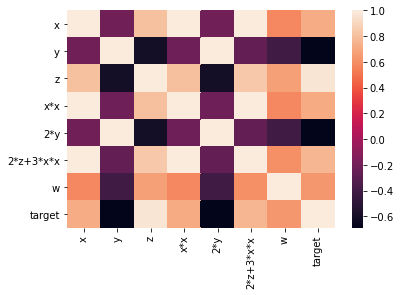

In [8]:
# b. plotting the heat map
sns.heatmap(corelationMatrix )

<pre>

1.2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
</pre>

In [106]:
# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
logistic = LogisticRegression(max_iter=10000, tol=0.1, penalty='l2')
pipe = Pipeline(steps=[ ('logistic', logistic)])
folds = KFold(5)
param_grid = {
    'logistic__C': np.logspace(-4, 4, 5)
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=folds)

search.fit(X, Y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=1.000):
{'logistic__C': 1.0}


<pre>
1.3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_
</pre>

In [107]:
# create new logistic regression model with best alpha value
best_C = search.best_params_['logistic__C']
best_logistic_model = LogisticRegression(C=best_C)
best_logistic_model.fit(X,Y)
best_logistic_model_accuracy = best_logistic_model.score(X,Y)
print(f" best logistic model accuracy", best_logistic_model_accuracy)
best_logistic_model_weights = best_logistic_model.coef_
print(f"Best logistic model coefficents", best_logistic_model_weights)

 best logistic model accuracy 1.0
Best logistic model coefficents [[ 0.72298832 -0.90354834  1.68256456  0.66730582 -0.90354834  0.80372108
   0.5096727 ]]


<pre>
1.4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
</pre>

In [108]:
#  added gaussian noise in order of 10^-2

X = X + np.random.normal(0,10**-2,X.shape)
# train best model on noisy data
best_logistic_model = LogisticRegression(C=best_C)
best_logistic_model.fit(X,Y)

# best_logistic_model.fit(X,Y)
best_logistic_model_accuracy_edited = best_logistic_model.score(X,Y)
print(f" best logistic model accuracy edited ", best_logistic_model_accuracy_edited)
best_logistic_model_weights_edited = best_logistic_model.coef_
print(f"Best logistic model coefficents edited", best_logistic_model_weights_edited)

 best logistic model accuracy edited  1.0
Best logistic model coefficents edited [[ 0.7247558  -0.90454959  1.67916368  0.67067216 -0.90852578  0.8019142
   0.51241448]]


<pre>
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>
</pre>

In [109]:
difference = abs(best_logistic_model_accuracy_edited - best_logistic_model_accuracy)
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy'", difference)

difference between 'best_model_accuracy_edited' and 'best_model_accuracy' 0.0


In [110]:

abs_weight_difference = abs(best_logistic_model_weights - best_logistic_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)

top4 = np.argsort(-abs_weight_percent_diff)[:,:4]
print('Top 4 feature index ',top4[:4]) #Top 4 feture index with highest difference in weights

features = data.columns

print("Top 4 features having highest absolute percentage weight change are", features[top4])

absolute weights difference [[0.00176748 0.00100124 0.00340088 0.00336634 0.00497744 0.00180688
  0.00274178]]
absolute weights percent difference [[0.17674816 0.10012428 0.34008815 0.33663424 0.49774396 0.18068811
  0.27417836]]
Top 4 feature index  [[4 2 3 6]]
Top 4 features having highest absolute percentage weight change are [['2*y' 'z' 'x*x' 'w']]


#### Experiment: 2 Linear SVM




<pre>

1.2. <b>Finding the best SVM model for the given data</b>
    a. Train SVM Model on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new SVM   with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
</pre>

In [112]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py
X = data.drop(['target'], axis=1).values
Y = data['target'].values

svm = LinearSVC( penalty='l2', max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[ ('svm', svm)])
folds = KFold(5)
param_grid = {
    'svm__C': np.logspace(-4, 4, 5)
}

search_svm = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=folds)

search_svm.fit(X, Y)
print("Best parameter (CV score=%0.3f):" % search_svm.best_score_)
print(search_svm.best_params_)

Best parameter (CV score=1.000):
{'svm__C': 0.0001}


<pre>
1.3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_
</pre>

In [113]:
# create new logistic regression model with best alpha value
best_C = search_svm.best_params_['svm__C']
best_svm_model = LinearSVC(C=best_C)
best_svm_model.fit(X,Y)
best_svm_model_accuracy = best_svm_model.score(X,Y)
print(f" best svm model accuracy", best_svm_model_accuracy)
best_svm_model_weights = best_svm_model.coef_
print(f"Best svm model coefficents", best_svm_model_weights)

 best svm model accuracy 1.0
Best svm model coefficents [[ 0.01323056 -0.01280974  0.01791372  0.01305589 -0.01280974  0.01391318
   0.01167827]]


<pre>
1.4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
</pre>

In [114]:
#  added gaussian noise in order of 10^-2

X = X + np.random.normal(0,10**-2,X.shape)
# train best model on noisy data
best_svm_model = LinearSVC(C=best_C)
best_svm_model.fit(X,Y)


best_svm_model_accuracy_edited = best_svm_model.score(X,Y)
print(f" best svm model accuracy edited ", best_svm_model_accuracy_edited)
best_svm_model_weights_edited = best_svm_model.coef_
print(f"Best svm model coefficents edited", best_svm_model_weights_edited)

 best svm model accuracy edited  1.0
Best svm model coefficents edited [[ 0.01325107 -0.01278229  0.01791113  0.01308231 -0.01282336  0.01390612
   0.01168814]]


<pre>
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>
</pre>

In [116]:
difference_svm_accuracy = abs(best_svm_model_accuracy_edited - best_svm_model_accuracy)
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy' for svm", difference_svm_accuracy)

difference between 'best_model_accuracy_edited' and 'best_model_accuracy' for svm 0.0


In [117]:

abs_weight_difference_svm = abs(best_svm_model_weights - best_svm_model_weights_edited)
print(f"absolute weights difference svm", abs_weight_difference_svm)
abs_weight_percent_diff_svm = abs_weight_difference_svm*100
print(f"absolute weights percent difference svm", abs_weight_percent_diff_svm)

top4_svm = np.argsort(-abs_weight_percent_diff_svm)[:,:4]
print('Top 4 feature index ',top4[:4]) #Top 4 feture index with highest difference in weights

features_svm = data.columns

print("Top 4 features having highest absolute percentage weight change  for svm model", features_svm[top4_svm])

absolute weights difference svm [[2.05101790e-05 2.74465914e-05 2.59356185e-06 2.64227525e-05
  1.36247731e-05 7.06079751e-06 9.86873931e-06]]
absolute weights percent difference svm [[0.00205102 0.00274466 0.00025936 0.00264228 0.00136248 0.00070608
  0.00098687]]
Top 4 feature index  [[4 2 3 6]]
Top 4 features having highest absolute percentage weight change  for svm model [['y' 'x*x' 'x' '2*y']]


#<pre> <font color='red'> Observation </font> </pre>

1. 
Multi colinearity is not affecting Accuracy of the model for our dataset for both linear and svm model.
2. 
By observing Top4 features with maximum abs percentage weights difference of original data and noisy data we can conclude that features having multi colinearity and high corelation is affected by outliers ( added noise) and coefficient are changing for those features.